# Practice: KMeans Clustering


In this notebook, data on eruptions from a famous geyser in Yellowstone Park is used for illustration purposes. 
It contains only two attributes, waiting time between eruptions (in minutes) and length of eruption (in minutes). 
This small dataset with just two attributes will be easier to use to create a simple k-means cluster model.
Most of the activities are either partially complete for you to finish
while some of them might require you to work out the all the code for the activity.

Kmeans is a kind of iterative descent algorithm, 
where you repeatedly find the minimum until it converges. 
A potential issue with this kind of algorithm is that it is not guaranteed to
find the most optimal cluster arrangement if you pick the wrong starting points. 
One method for overcoming this is to run the algorithm a number of times with 
different randomly selected starting points, and then pick the solution
that has the lowest total squared Euclidean distance. 
This approach is used in the scikit-learn package, defaulting to 10 separate repetitions.

Scikit-learn uses numpy arrays, so make sure you format your data accordingly.

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot

In [2]:
eruptions = pd.read_csv("/dsa/data/all_datasets/eruptions/eruptions.txt")
eruptions[:4]

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62


**Activity 1:** Convert the data "eruptions" into an array and save the result in a variable called eruptions_data. 

In [3]:
# Your code for activity 1 goes here.
# -----------------------------------

eruptions_data = eruptions.as_matrix()

# Print first five rows of data
eruptions_data[:5]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([[  3.6  ,  79.   ],
       [  1.8  ,  54.   ],
       [  3.333,  74.   ],
       [  2.283,  62.   ],
       [  4.533,  85.   ]])

**Activity 2:** Run the Kmeans algorithm on eruptions_data with two clusters.

In [4]:
# Your code for activity 2 goes here.
# -----------------------------------
from sklearn.cluster import KMeans
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(eruptions_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Get the locations of the centroids and the label of the owning cluster for each observation in the data set:

In [5]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [6]:
centroids[0]

array([  4.29793023,  80.28488372])

**Activity 3:** Plot the clusters and their calculated centroids.

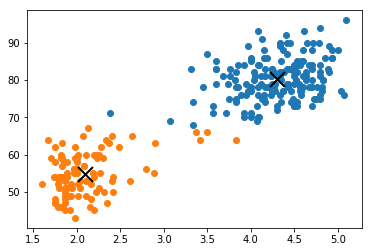

In [7]:
# Your code for activity 3 goes here.
# -----------------------------------


for i in range(k): # repeat loop n times for n clusters
    ds = eruptions_data[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(ds[:,0],ds[:,1],'o')  
    lines = pyplot.plot(centroids[i][0],centroids[i][1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

**Activity 4:** Run the Kmeans algorithm on eruptions_data with six clusters, and get the locations of the centroids and the label of the owning cluster for each observation in the data set:

In [8]:
# Your code for activity 4 goes here.
# -----------------------------------


k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(eruptions_data)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

**Activity 5:** Plot the clusters and their calculated centroids.

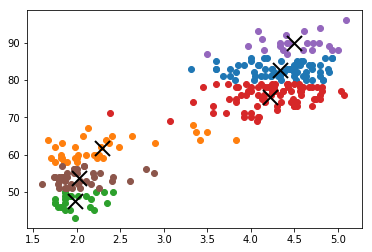

In [9]:
# Your code for activity 5 goes here.
# -----------------------------------


for i in range(k): # repeat loop n times for n clusters
    ds = eruptions_data[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(ds[:,0],ds[:,1],'o')  
    lines = pyplot.plot(centroids[i][0],centroids[i][1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

The scikit-learn package also has a function that allows you to get the centroids and labels directly:

In [10]:
from sklearn import cluster

k=2
centroids,labels,inertia = cluster.k_means(eruptions_data,n_clusters=k)

By using the KMeans object directly we can make predictions on new observations and assign them to clusters. 

Split the data into a training set and a test set so that K-means clustering can be performed on the training set and use the test set to make predictions. A simple way to split the data is to do a random split as shown below.

In [11]:
import numpy as np
import numpy.random as npr
import math

def split_data(data,train_split=0.8):
    num_train = math.floor(data.shape[0] * train_split)
    npr.shuffle(data)
    return (data[:num_train],data[num_train:])

training_data,test_data = split_data(eruptions_data)

The predictions are then simply calculated:

In [12]:
labels = kmeans.predict(test_data)

Plotting the predictions, as before, for 2 clusters

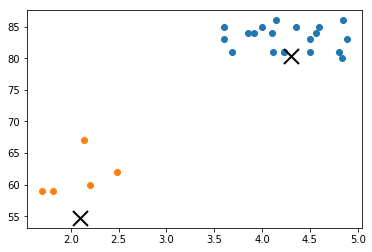

In [13]:
for i in range(k):
    ds = test_data[np.where(labels==i)]
    pyplot.plot(ds[:,0],ds[:,1],'o')
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

# Save your notebook, then `File > Close and Halt`